In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils.data_extractor import download_single_ticker_forex_data

In [16]:
eur_to_inr = download_single_ticker_forex_data("EUR", "INR")

/Users/arjunprakashrao/Drive/projects/forex-agent/utils/data_extractor.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  forex_data = yf.download(ticker_full, start='2000-01-02', end='2025-10-01')
[*********************100%***********************]  1 of 1 completed


In [17]:
eur_to_inr

,Close_EURINR=X
Date,
2003-12-01,54.700001
2003-12-02,55.139000
2003-12-03,55.181000
2003-12-04,55.000999
2003-12-05,55.370998
...,...
2025-08-25,100.411003
2025-08-26,101.669998
2025-08-27,101.920998


In [18]:
eur_to_inr['log_returns'] = np.log(eur_to_inr['Close_EURINR=X']/eur_to_inr['Close_EURINR=X'].shift(1))
eur_to_inr.dropna(inplace=True)
eur_to_inr

,Close_EURINR=X,log_returns
Date,,
2003-12-02,55.139000,0.007994
2003-12-03,55.181000,0.000761
2003-12-04,55.000999,-0.003267
2003-12-05,55.370998,0.006705
2003-12-08,55.563999,0.003480
...,...,...
2025-08-25,100.411003,-0.008815
2025-08-26,101.669998,0.012460
2025-08-27,101.920998,0.002466


# Graphs

<Axes: xlabel='Date'>

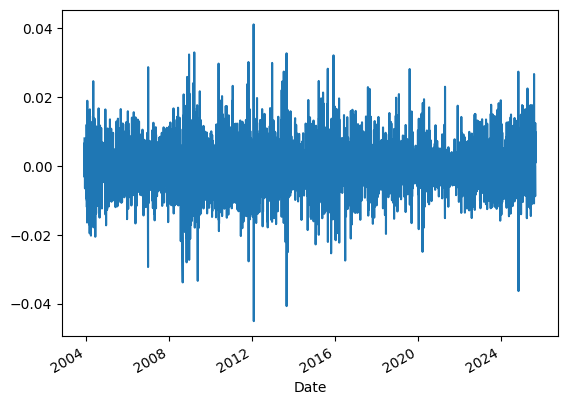

In [19]:
eur_to_inr['log_returns'].plot()

In [20]:
eur_to_inr.sum(), eur_to_inr.mean(), eur_to_inr.std()

(Close_EURINR=X    412000.650467
 log_returns            0.632948
 dtype: float64,
 Close_EURINR=X    73.036811
 log_returns        0.000112
 dtype: float64,
 Close_EURINR=X    12.152075
 log_returns        0.006861
 dtype: float64)

# Time series analysis

In [21]:
from statsmodels.tsa.stattools import adfuller
from models.time_series import time_series as ts

In [22]:
# Using ADF test to check for stationarity
eur_to_inr_list = eur_to_inr['log_returns'].to_list()
ad_stats = adfuller(eur_to_inr_list, regression='ct', autolag='BIC')
ad_stats

(np.float64(-33.333469079013376),
 0.0,
 4,
 5636,
 {'1%': np.float64(-3.9603771945043054),
  '5%': np.float64(-3.411269276915042),
  '10%': np.float64(-3.1275088887722604)},
 np.float64(-40061.873443233635))

In [23]:
# Simple moving average

eur_to_inr = ts.simple_moving_average(price_movement=eur_to_inr, price_row='Close_EURINR=X', periods=720)
eur_to_inr

,Close_EURINR=X,log_returns,SMA_last_720
Date,,,
2003-12-02,55.139000,0.007994,NaN
2003-12-03,55.181000,0.000761,NaN
2003-12-04,55.000999,-0.003267,NaN
2003-12-05,55.370998,0.006705,NaN
2003-12-08,55.563999,0.003480,NaN
...,...,...,...
2025-08-25,100.411003,-0.008815,90.936539
2025-08-26,101.669998,0.012460,90.960211
2025-08-27,101.920998,0.002466,90.984552


<Axes: xlabel='Date'>

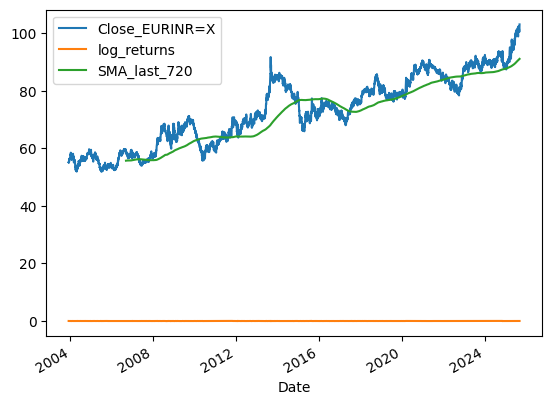

In [24]:
eur_to_inr.plot()

In [25]:
forecast = ts.arima_train_and_pred(eur_to_inr['log_returns'], pred_period=1)

/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model

In [26]:
eur_to_inr['log_returns']

Date
2003-12-02    0.007994
2003-12-03    0.000761
2003-12-04   -0.003267
2003-12-05    0.006705
2003-12-08    0.003480
                ...   
2025-08-25   -0.008815
2025-08-26    0.012460
2025-08-27    0.002466
2025-08-28    0.000863
2025-08-29    0.009750
Name: log_returns, Length: 5641, dtype: float64

In [27]:
forecast

np.float64(-0.0015171039540000436)

In [32]:
backfill_arima = ts.backtest_arima(eur_to_inr['log_returns'][0:1000])

/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be s

In [33]:
backfill_arima

,original,predicted
0,0.006705,0.001825
1,0.003480,-0.000389
2,0.001618,0.001101
3,-0.006544,0.002443
4,0.004511,0.008445
...,...,...
992,0.000408,-0.000973
993,-0.008057,-0.000387
994,-0.010645,0.001156
995,0.000108,0.002098


<Axes: >

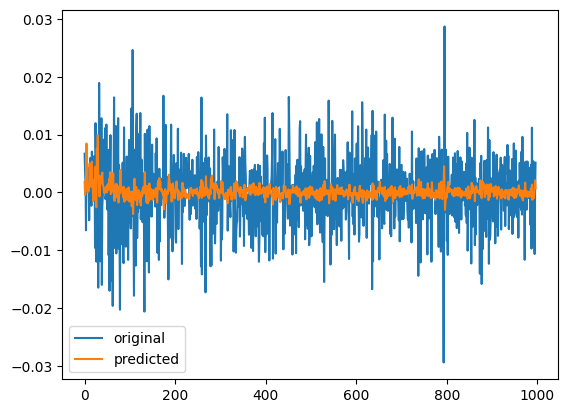

In [34]:
backfill_arima.plot()